In [1]:
## Import all of our necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
## Read in our data from the CSV file and then look at the top five values
data = pd.read_csv('data.csv')

data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [3]:
## Look at some stats on our data
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [4]:
## Remove the columns that are not necessary for us
data.pop('fnlwgt')
data.pop('capital-gain')
data.pop('capital-loss')

data.head(5)
## Looking better now!

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income_>50K
0,67,Private,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,60,United-States,1
1,17,Private,12th,8,Never-married,Other-service,Own-child,White,Male,15,United-States,0
2,31,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1
3,58,State-gov,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,0
4,25,State-gov,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,40,United-States,0


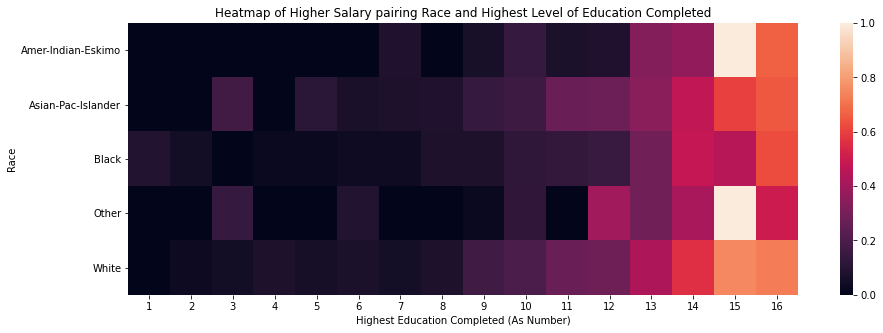

In [5]:
## Create some Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

data_matrix = data.pivot_table(index='race', columns='educational-num', values='income_>50K')

data_matrix.head()

fig = plt.figure(figsize=(15,5))
heat_map = sns.heatmap(data_matrix)
heat_map.set_title("Heatmap of Higher Salary pairing Race and Highest Level of Education Completed")
heat_map.set_xlabel("Highest Education Completed (As Number)")
heat_map.set_ylabel("Race")

## Uncomment the two lines below if you wish to save the graph as an image
##graph = heat_map.get_figure()
##graph.savefig("heatmap.png") 

<Figure size 1440x720 with 0 Axes>

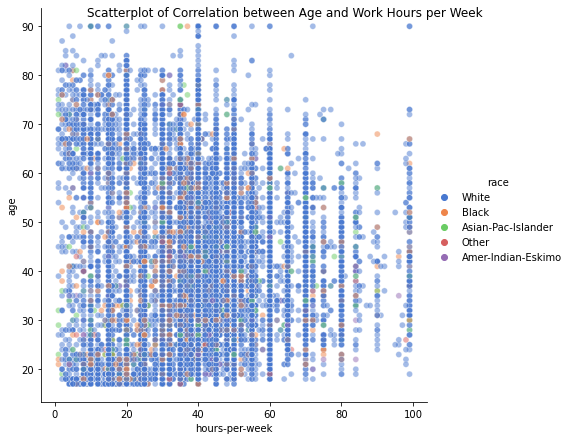

In [9]:
##Create a scatterplot
fig = plt.figure(figsize=(20,10))
scatter_plot = sns.relplot(x="hours-per-week", y="age", hue="race", alpha=.5, palette="muted",
            height=6, data=data)
scatter_plot.fig.suptitle("Scatterplot of Correlation between Age and Work Hours per Week")

## Uncomment the two lines below if you wish to save the graph as an image
scatter_plot.savefig("scatter-plot.png") 

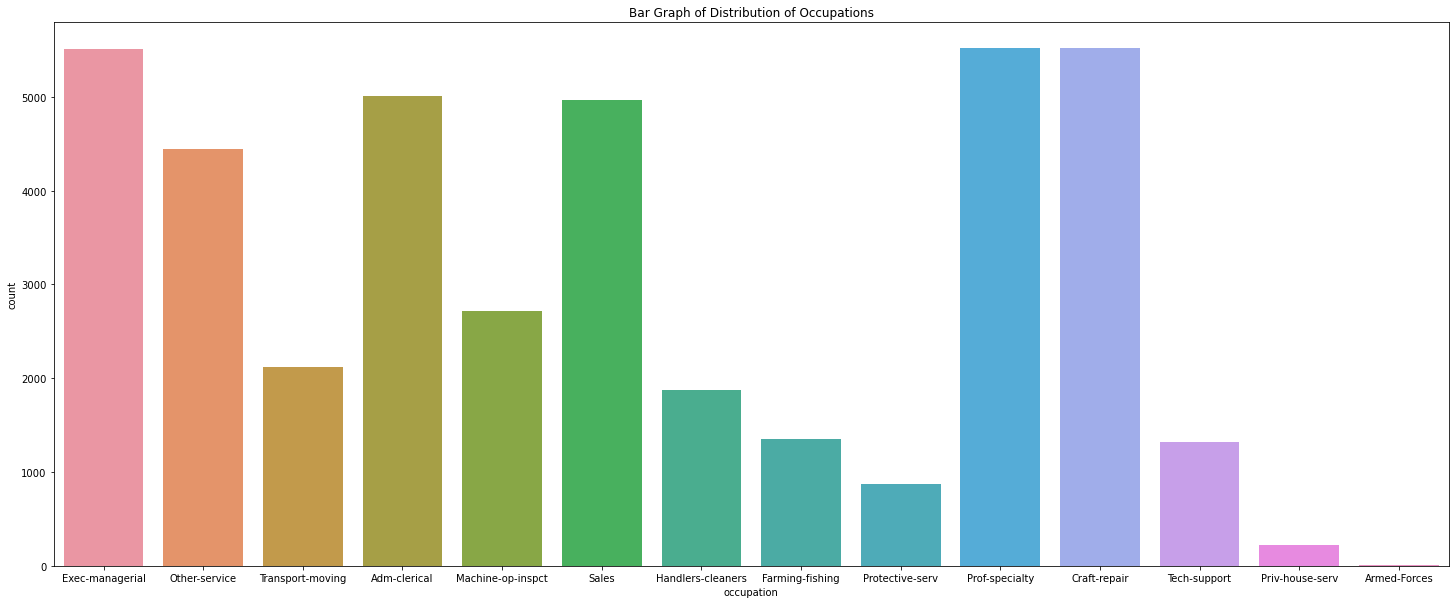

In [7]:
##Create a bar graph
plt.figure(figsize=(25,10))
bar_graph = sns.countplot(data=data, x='occupation')

bar_graph.set_title("Bar Graph of Distribution of Occupations")


## Uncomment the two lines below if you wish to save the graph as an image
##graph = bar_graph.get_figure()
##graph.savefig("bar-graph.png") 

In [ ]:
## Now rid of the education as number
data.pop('educational-num') # Already provided

In [ ]:
## Calculate Dummy Values for the Data
data = pd.get_dummies(data)
data.head(5)

In [ ]:
## Extract the Data Label from the Training Set
data_labels = np.array(data.pop('income_>50K'))

In [ ]:
## Split our Data into the appropriate sets
train, test, train_labels, test_labels = train_test_split(data, data_labels, stratify = data_labels, test_size = 0.25, random_state = 42)

In [ ]:
## Fill in our missing values
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [ ]:
## Create our model with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=42, max_features = 'sqrt', n_jobs=-1, verbose = 1)

In [ ]:
## TRAIN THE MODEL!!!
model.fit(train, train_labels)

In [ ]:
# Use the forest's predict method on the test data
predictions = model.predict(test)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
#Export our model so that we can use it in our API
import joblib
joblib.dump(model, 'model.pkl')

In [ ]:
#Export our model columns.
# Necessary, because there would be a LOT of duplicate lines written
model_columns = list(train.columns)
joblib.dump(model_columns, 'model_columns.pkl')